## Arquivo de testes do descritor de características HoG

In [1]:
!nvidia-smi

Fri Jun 27 23:46:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.127.05             Driver Version: 550.127.05     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA H100 80GB HBM3          On  |   00000000:1B:00.0 Off |                    0 |
| N/A   25C    P0             67W /  700W |       4MiB /  81559MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [2]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline
!nvcc --version

try:
    import google.colab
    _ON_COLAB = True
except:
    _ON_COLAB = False

print('Running on Google Colab = ', _ON_COLAB)
import os
import torch
from IPython import get_ipython
import os
# Definir o caminho base
if _ON_COLAB:
    BASE_PATH = "/content"
    import locale
    locale.getpreferredencoding = lambda: "UTF-8"
else:
    BASE_PATH = "/lapix" # trocar para o base path do seu computador se estiver rodando localmente, deixar /lapix se estiver rodando nos conteiners lapix
    VISIBLE_GPUS = [3] # Selecionar a GPU PARA RODAR! VER QUAL ESTA LIVRE

    if torch.cuda.device_count() != 8:
        print("GPU SETADA - PULANDO ETAPA")
    else:
        os.environ["CUDA_VISIBLE_DEVICES"] = str(VISIBLE_GPUS).replace("]", "").replace("[","").replace(" ", "")
        os.environ["NVIDIA_VISIBLE_DEVICES"] = str(VISIBLE_GPUS).replace("]", "").replace("[","").replace(" ", "")
        print("CUDA GPUS NUMBER: ", torch.cuda.device_count())
    
os.chdir(BASE_PATH) # garantir que está executando no caminho base definido

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Mar_28_02:18:24_PDT_2024
Cuda compilation tools, release 12.4, V12.4.131
Build cuda_12.4.r12.4/compiler.34097967_0
Running on Google Colab =  False
CUDA GPUS NUMBER:  1


In [8]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.feature import hog
from skimage import data, color, exposure
from PIL import Image

In [9]:
image_folder_path = r"arquivos/Object-detection-via-HOG-SVM/data/ex_happywhale"
image_files = [f for f in os.listdir(image_folder_path)
               if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

In [10]:
import random

In [12]:
selected_images = random.sample(image_files, min(10, len(image_files)))
orientations = 10
pixels_per_cell = (32, 32)  # Larger cell for larger objects
cells_per_block = (3, 3)

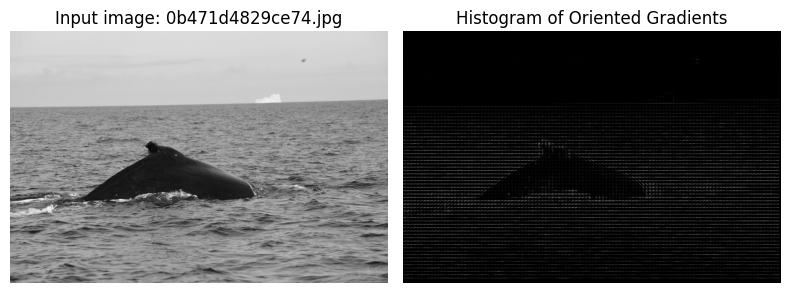

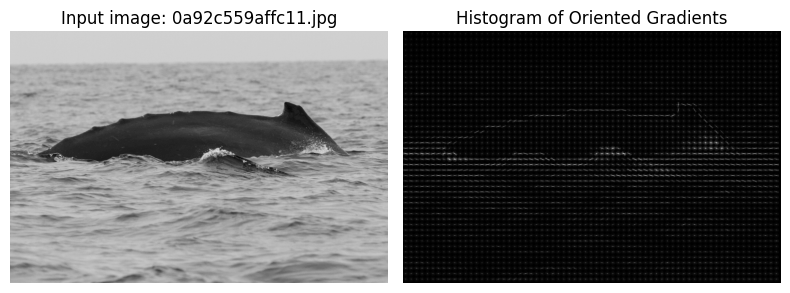

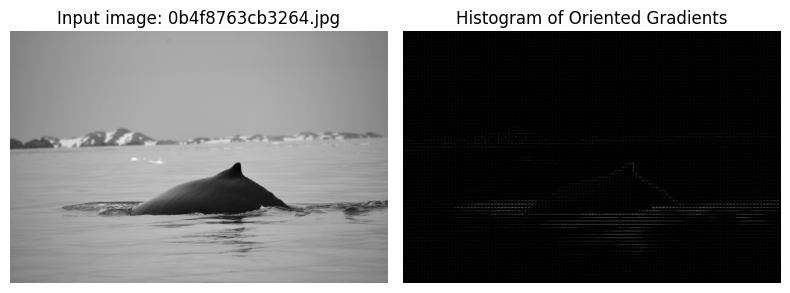

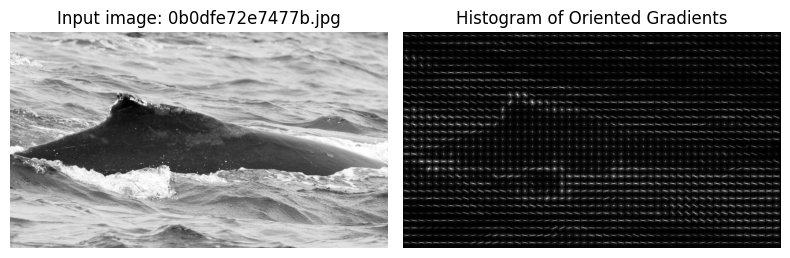

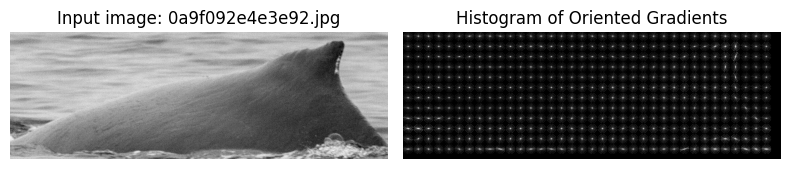

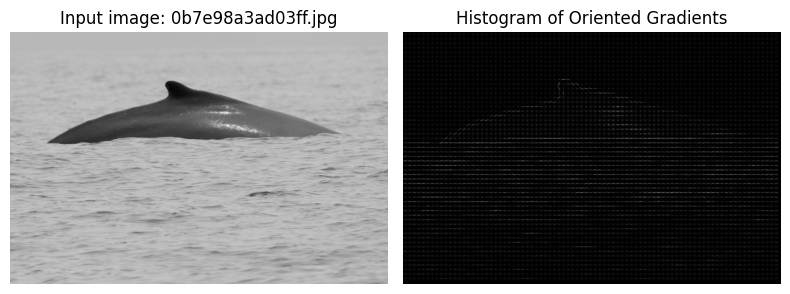

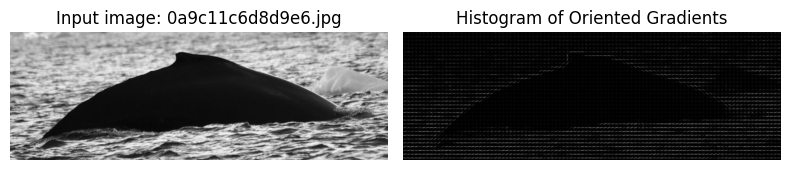

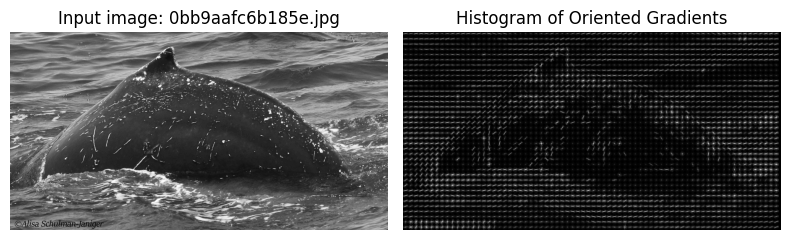

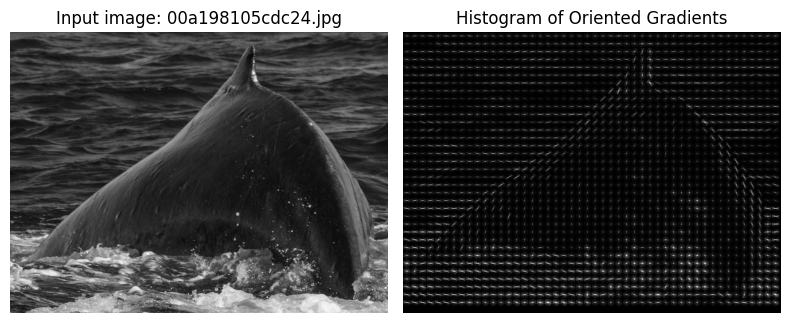

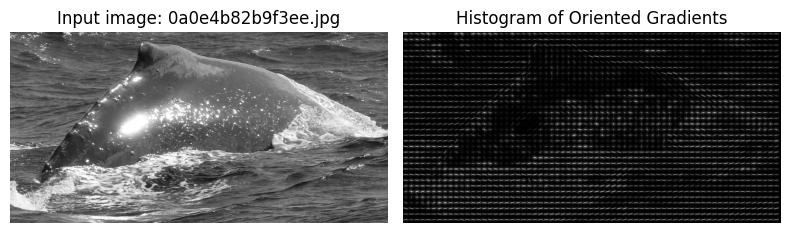

In [13]:
for img_name in selected_images:
    img_path = os.path.join(image_folder_path, img_name)
    try:
        img = io.imread(img_path)

        # Convert to grayscale if not already
        if img.ndim == 3 and img.shape[2] == 3:
            image = color.rgb2gray(img)
        elif img.ndim == 2:
            image = img  # already grayscale
        else:
            print(f"Skipping {img_name}: unsupported image format.")
            continue

        #fd, hog_image = hog(image, orientations=9, pixels_per_cell=(64, 64),
        #                    cells_per_block=(3, 3), visualize=True)

        fd, hog_image = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                            cells_per_block=cells_per_block, visualize=True)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

        ax1.axis('off')
        ax1.imshow(image, cmap=plt.cm.gray)
        ax1.set_title(f'Input image: {img_name}')
        ax1.set_adjustable('box')

        # Rescale histogram for better display
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

        ax2.axis('off')
        ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
        ax2.set_title('Histogram of Oriented Gradients')
        ax2.set_adjustable('box')

        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Failed to process {img_name}: {e}")